# CNN

Vamos a buscar mejorar el modelo de la clase pasada, utilizando una CNN.

Les recomiendo activar la GPU para que este notebook corra más rápido (sobre todo la parte de entrenamiento del modelo)

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

Primero cargarmos MINST.

Hay que tener en cuenta que las layers Conv2D de tensorflow esperan recibir como input shape algo de la forma (tamaño del dataset, alto img, ancho img, canales).

En este caso trabajamos con imagenes en blanco y negro por lo que constan de 1 solo canal.

Eso lo especificamos en el siguiente reshape.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


En redes neuronales, es bueno escalar los datos. Llevamos todo a valores entre 0 y 1:

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Aplicamos one hot encoder como la clase pasada:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Ahora vamos a definir el modelo.

EJERCICIO:

Definir una CNN de la siguiente manera:

- Capa Conv2D de 32 neuronas, filtro de 3x3, activación relu. Recuerden que deben definir también el input shape en esta capa.

- Capa MaxPooling2D con filtro de 2x2

- Capa Conv2D de 64 neuronas, filtro de 3x3 y activación relu

- Capa Max pooling de 2x2

In [ ]:
#COMPLETAR
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Loss en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

Epoch 1/10
1500/1500 [==============================] - 16s 6ms/step - loss: 0.2435 - accuracy: 0.9298 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.0547 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0442 - val_accuracy: 0.9863
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0451 - val_accuracy: 0.9864
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0335 - val_accuracy

Podemos ver como quedo nuestro modelo hasta ahora:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Si definieron todo bien, deberían ver una tabla como esta:

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
=================================================================
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________

```



Ahora, en la tabla anterior pordemos ver las dimensiones de salida de cada capa.

Teniendo esto en cuenta, agregar al modelo:

- Flatten para aplanar la salida
- Una capa densa de 64 neuronas con activación relu
- La capa de salida: ¿Cómo debe ser esta capa? ¿De qué tipo? ¿Cuántas neuronas? ¿Qué función de activación?

In [ ]:
#COMPLETAR

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Ahora entrenamos el modelo:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0430 - val_accuracy

Visualizamos métricas

313/313 - 1s - loss: 0.0339 - accuracy: 0.9926 - 657ms/epoch - 2ms/step


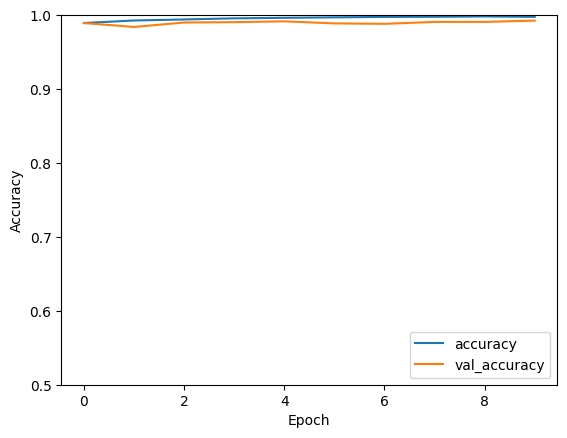

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

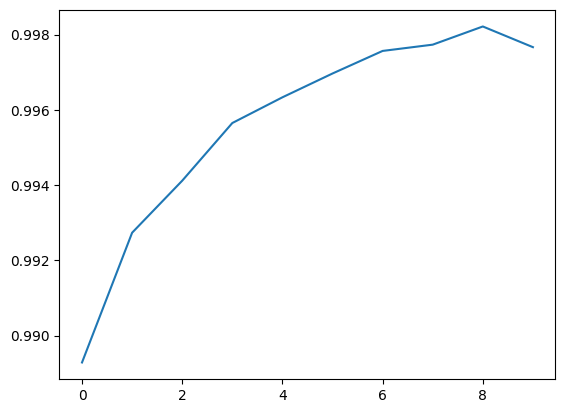

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')

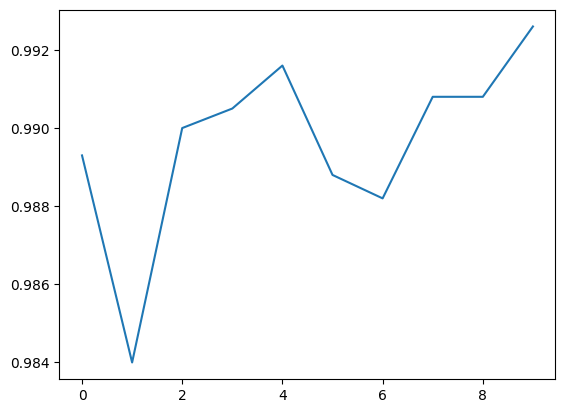

In [ ]:
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

In [ ]:
print(test_acc)

0.9926000237464905


Pueden jugar agregando o quitando capas al modelo